In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        distance = euclidean_distance(x_test, X_train[i])
        distances.append((X_train[i], distance, y_train[i]))

    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]

    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[2]
        weight = 1 / (neighbor[1] + 1e-9) 

        if label in class_votes:
            class_votes[label] += weight
        else:
            class_votes[label] = weight

    return max(class_votes, key=class_votes.get)



In [39]:
# Evaluasi multiclass
def evaluate_multiclass(y_true, y_pred):
    unique_classes = np.unique(y_true)
    confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)
    
    class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}

    # Membuat confusion matrix
    for true_label, pred_label in zip(y_true, y_pred):
        true_idx = class_to_index[true_label]
        pred_idx = class_to_index[pred_label]
        confusion_matrix[true_idx, pred_idx] += 1

    # Menghitung metrik evaluasi (Accuracy, Precision, Recall, F1-score)
    metrics = {"Accuracy": 0, "Precision": {}, "Recall": {}, "F1-Score": {}}
    prediksi_benar = np.trace(confusion_matrix)
    total_prediksi = np.sum(confusion_matrix)

    for cls in unique_classes:
        cls_idx = class_to_index[cls]
        TP = confusion_matrix[cls_idx, cls_idx]
        FP = np.sum(confusion_matrix[:, cls_idx]) - TP
        FN = np.sum(confusion_matrix[cls_idx, :]) - TP

        # Precision, Recall, F1-Score (per kelas)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics["Precision"][cls] = precision
        metrics["Recall"][cls] = recall
        metrics["F1-Score"][cls] = f1_score

    metrics["Accuracy"] = prediksi_benar / total_prediksi if total_prediksi > 0 else 0

    return confusion_matrix, metrics, unique_classes



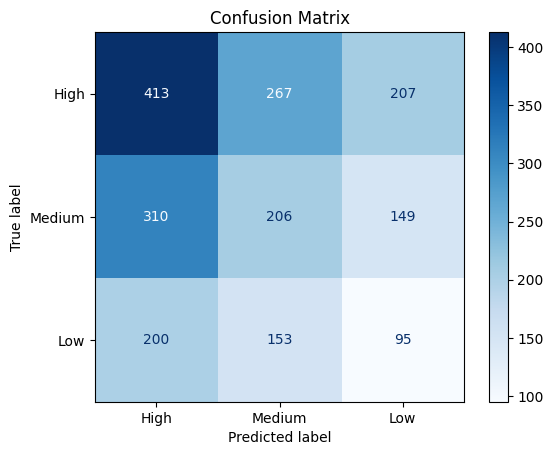

Hasil Pengukuran:
  Accuracy Global: 0.36

Class High:
  Precision: 0.45
  Recall: 0.47
  F1-Score: 0.46

Class Medium:
  Precision: 0.33
  Recall: 0.31
  F1-Score: 0.32

Class Low:
  Precision: 0.21
  Recall: 0.21
  F1-Score: 0.21



In [40]:
# Load dataset
data = pd.read_csv('vehicle_dataset_clean.csv')


X = data[['vehicle_type', 'fuel_type', 'engine_size', 'age_of_vehicle', 'mileage']].values
y = data['emission_level'].values

# Penetapan Data Training dan Data Testing
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# K value
k = 3

# Klasifikasi
predictions = [k_nearest_neighbors(X_train, y_train, test, k) for test in X_test]

# Evaluasi
confusion_matrix,metrics,unique_classes = evaluate_multiclass(y_test, predictions)

label = ['High', 'Medium', 'Low']
class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}
index = [class_to_index[label] for label in label]
reordered_cm = confusion_matrix[np.ix_(index, index)]
ConfusionMatrixDisplay(confusion_matrix=reordered_cm, display_labels=label).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Hasil Pengukuran:")
print(f"  Accuracy Global: {metrics['Accuracy']:.2f}\n")
for cls in label:
    print(f"Class {cls}:")
    print(f"  Precision: {metrics['Precision'][cls]:.2f}")
    print(f"  Recall: {metrics['Recall'][cls]:.2f}")
    print(f"  F1-Score: {metrics['F1-Score'][cls]:.2f}\n")